In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
import tensorflow as tf

# Import our input dataset
charityDF = pd.read_csv('charity_data.csv')
charityDF.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Preprocessing
    # 1) Discover categorical variables and values
# 2) Drop STATUS, SPECIAL_CONSIDERATIONS, 
# 3) Define target variables and features
    # 4) Bucket rare variables as needed

In [3]:
# Generate our categorical variable list
catVariables = charityDF.dtypes[charityDF.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
charityDF[catVariables].nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
dtype: int64

In [4]:
# Check the unique value counts for APPLICATION_TYPE
applicationCount = charityDF.APPLICATION_TYPE.value_counts()
applicationCount

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7fd0324da810&gt;

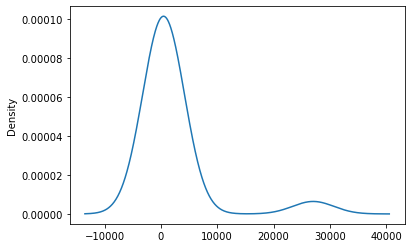

In [5]:
# visualize Application_Type count
applicationCount.plot.density()

In [6]:
# Check the unique value counts for AFFILIATION
affiliationCount = charityDF.AFFILIATION.value_counts()
affiliationCount

Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

In [8]:
# Check the unique value counts for CLASSIFICATION
classificationCount = charityDF.CLASSIFICATION.value_counts()
classificationCount

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C6100        1
C1236        1
C3700        1
C5200        1
C2561        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [10]:
# Check the unique value counts for USE_CASE
useCaseCount = charityDF.USE_CASE.value_counts()
useCaseCount

Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64

In [11]:
organizationCount = charityDF.ORGANIZATION.value_counts()
organizationCount

Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: int64

In [12]:
# Check the unique value counts for INCOME_AMT
incomeCount = charityDF.INCOME_AMT.value_counts()
incomeCount

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

In [17]:
# Bucketing APPLICATION_TYPE

# Determine which value to replace
replaceApplication = list(applicationCount[applicationCount < 2000].index)

# Replace in charityDF
for application in replaceApplication:
    charityDF.APPLICATION_TYPE = charityDF.APPLICATION_TYPE.replace(application, "Other")

# Check bucketing success
charityDF.APPLICATION_TYPE.value_counts()

In [18]:
# Bucketing AFFILIATION

# Determine which value to replace
replaceAffiliation = list(affiliationCount[affiliationCount < 10000].index)

# Replace in charityDF
for affiliation in replaceAffiliation:
    charityDF.AFFILIATION = charityDF.AFFILIATION.replace(affiliation, "Other")

# Check bucketing success
charityDF.AFFILIATION.value_counts()

In [19]:
# Bucketing CLASSIFICATION

# Determine which value to replace
replaceClassification = list(classificationCount[classificationCount < 1000].index)

# Replace in charityDF
for classification in replaceClassification:
    charityDF.CLASSIFICATION = charityDF.CLASSIFICATION.replace(classification, "Other")

# Check bucketing success
charityDF.CLASSIFICATION.value_counts()

In [ ]:
# Bucketing USE_CASE

# Determine which value to replace
replaceUseCase = list(useCaseCount[useCaseCount < 5000].index)

# Replace in charityDF
for useCase in replaceUseCase:
    charityDF.USE_CASE = charityDF.USE_CASE.replace(useCase, "Other")

# Check bucketing success
charityDF.USE_CASE.value_counts()

In [ ]:
# Bucketing ORGANIZATION

# Determine which value to replace
replaceOrganization = list(organizationCount[organizationCount < 10000].index)

# Replace in charityDF
for organization in replaceOrganization:
    charityDF.ORGANIZATION = charityDF.ORGANIZATION.replace(organization, "Other")

# Check bucketing success
charityDF.ORGANIZATION.value_counts()

In [20]:
# Bucketing INCOME_AMT

# Determine which value to replace
replaceIncome = list(incomeCount[incomeCount < 500].index)

# Replace in charityDF
for income in replaceIncome:
    charityDF.INCOME_AMT = charityDF.INCOME_AMT.replace(income, "5M+")

# Check bucketing success
charityDF.INCOME_AMT.value_counts()